In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
pip install --upgrade librosa


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')


from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split

# Function to load data with Fourier transformation
def load_data_with_fourier(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using librosa
                    audio, _ = librosa.load(audio_path, sr=None)

                    # Compute Short-Time Fourier Transform (STFT)
                    stft = librosa.stft(audio, n_fft=2048, hop_length=int(len(audio) / max_length))
                    stft = np.abs(stft)

                    # Pad or truncate the STFT to the specified max_length
                    if stft.shape[1] < max_length:
                        padding = np.zeros((stft.shape[0], max_length - stft.shape[1]))
                        stft = np.concatenate((stft, padding), axis=1)
                    else:
                        stft = stft[:, :max_length]

                    data.append(stft)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    return np.array(data), np.array(labels)



In [ ]:
# Path to the data
data_dir = '/content/drive/MyDrive/ip'
max_length = 128  # Adjust based on the characteristics of your dataset

# Load data with Fourier transformation
data, labels = load_data_with_fourier(data_dir, max_length)

# Convert labels to categorical
num_classes = len(np.unique(labels))
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)
# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(data.shape[1], data.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(val_data, val_labels))

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1350
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2025
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1080
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1620
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 51719 (202.03 KB)
Trainable params: 51719 (202.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load data with Fourier transformation
def load_data_with_fourier(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using librosa
                    audio, _ = librosa.load(audio_path, sr=None)

                    # Compute Short-Time Fourier Transform (STFT)
                    stft = librosa.stft(audio, n_fft=2048, hop_length=int(len(audio) / max_length))
                    stft = np.abs(stft)

                    # Pad or truncate the STFT to the specified max_length
                    if stft.shape[1] < max_length:
                        padding = np.zeros((stft.shape[0], max_length - stft.shape[1]))
                        stft = np.concatenate((stft, padding), axis=1)
                    else:
                        stft = stft[:, :max_length]

                    data.append(stft)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/ip'
max_length = 128  # Adjust based on the characteristics of your dataset

# Load data with Fourier transformation
data, labels = load_data_with_fourier(data_dir, max_length)

# Convert labels to categorical
num_classes = len(np.unique(labels))
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)

# Reshape data for CNN
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], val_data.shape[2], 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the validation set
val_predictions = model.predict(val_data)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(val_true_classes, val_predictions_classes)
precision = precision_score(val_true_classes, val_predictions_classes, average='weighted')
recall = recall_score(val_true_classes, val_predictions_classes, average='weighted')
f1 = f1_score(val_true_classes, val_predictions_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1350
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2025
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1080
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1620
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 126, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 511, 63, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 61, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 254, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 487680)            0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

# Function to load data with Fourier transformation and random sampling
def load_data_with_fourier_random(data_dir, max_length, num_samples_per_class=150):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)

        # Get a random subset of files
        audio_files = random.sample(os.listdir(class_dir), min(num_samples_per_class, len(os.listdir(class_dir))))

        for audio_file in audio_files:
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using librosa
                    audio, _ = librosa.load(audio_path, sr=None)

                    # Compute Short-Time Fourier Transform (STFT)
                    stft = librosa.stft(audio, n_fft=2048, hop_length=int(len(audio) / max_length))
                    stft = np.abs(stft)

                    # Pad or truncate the STFT to the specified max_length
                    if stft.shape[1] < max_length:
                        padding = np.zeros((stft.shape[0], max_length - stft.shape[1]))
                        stft = np.concatenate((stft, padding), axis=1)
                    else:
                        stft = stft[:, :max_length]

                    data.append(stft)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/spectral_reduced_audio'
max_length = 128  # Adjust based on the characteristics of your dataset

# Load data with Fourier transformation and random sampling
data, labels = load_data_with_fourier_random(data_dir, max_length, num_samples_per_class=150)

# Convert labels to categorical
num_classes = len(np.unique(labels))
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)

# Reshape data for CNN
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], val_data.shape[2], 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the validation set
val_predictions = model.predict(val_data)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Calculate metrics
accuracy = accuracy_score(val_true_classes, val_predictions_classes)
precision = precision_score(val_true_classes, val_predictions_classes, average='weighted')
recall = recall_score(val_true_classes, val_predictions_classes, average='weighted')
f1 = f1_score(val_true_classes, val_predictions_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/spectral_reduced_audio'

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

# Function to load data with Fourier transformation and random sampling
def load_data_with_fourier_random(data_dir, max_length, num_samples_per_class=150):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)

        # Get a random subset of files
        audio_files = random.sample(os.listdir(class_dir), min(num_samples_per_class, len(os.listdir(class_dir))))

        for audio_file in audio_files:
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using librosa
                    audio, _ = librosa.load(audio_path, sr=None)

                    # Compute Short-Time Fourier Transform (STFT)
                    stft = librosa.stft(audio, n_fft=2048, hop_length=int(len(audio) / max_length))
                    stft = np.abs(stft)

                    # Pad or truncate the STFT to the specified max_length
                    if stft.shape[1] < max_length:
                        padding = np.zeros((stft.shape[0], max_length - stft.shape[1]))
                        stft = np.concatenate((stft, padding), axis=1)
                    else:
                        stft = stft[:, :max_length]

                    data.append(stft)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/ip'
max_length = 128  # Adjust based on the characteristics of your dataset

# Load data with Fourier transformation and random sampling
data, labels = load_data_with_fourier_random(data_dir, max_length, num_samples_per_class=150)

# Convert labels to categorical
num_classes = len(np.unique(labels))
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)

# Reshape data for CNN
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], val_data.shape[2], 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the validation set
val_predictions = model.predict(val_data)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Calculate metrics
accuracy = accuracy_score(val_true_classes, val_predictions_classes)
precision = precision_score(val_true_classes, val_predictions_classes, average='weighted')
recall = recall_score(val_true_classes, val_predictions_classes, average='weighted')
f1 = f1_score(val_true_classes, val_predictions_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1350
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1080
  warnings.warn(


Epoch 1/15
30/30 [==============================] - 4s 69ms/step - loss: 2.2692 - accuracy: 0.2698 - val_loss: 1.6800 - val_accuracy: 0.3714
Epoch 2/15
30/30 [==============================] - 2s 58ms/step - loss: 1.5028 - accuracy: 0.4254 - val_loss: 1.4129 - val_accuracy: 0.4952
Epoch 3/15
30/30 [==============================] - 2s 59ms/step - loss: 1.2521 - accuracy: 0.5164 - val_loss: 1.2718 - val_accuracy: 0.4952
Epoch 4/15
30/30 [==============================] - 2s 65ms/step - loss: 1.1000 - accuracy: 0.6085 - val_loss: 1.3072 - val_accuracy: 0.4952
Epoch 5/15
30/30 [==============================] - 2s 74ms/step - loss: 0.9030 - accuracy: 0.6825 - val_loss: 1.0241 - val_accuracy: 0.6095
Epoch 6/15
30/30 [==============================] - 2s 69ms/step - loss: 0.7742 - accuracy: 0.7323 - val_loss: 0.9716 - val_accuracy: 0.6571
Epoch 7/15
30/30 [==============================] - 2s 69ms/step - loss: 0.6327 - accuracy: 0.7799 - val_loss: 1.0784 - val_accuracy: 0.6095
Epoch 8/15
30

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

# Function to load data with Fourier transformation and random sampling
def load_data_with_fourier_random(data_dir, max_length, num_samples_per_class=150):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)

        # Get a random subset of files
        audio_files = random.sample(os.listdir(class_dir), min(num_samples_per_class, len(os.listdir(class_dir))))

        for audio_file in audio_files:
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using librosa
                    audio, _ = librosa.load(audio_path, sr=None)

                    # Compute Short-Time Fourier Transform (STFT)
                    stft = librosa.stft(audio, n_fft=2048, hop_length=int(len(audio) / max_length))
                    stft = np.abs(stft)

                    # Pad or truncate the STFT to the specified max_length
                    if stft.shape[1] < max_length:
                        padding = np.zeros((stft.shape[0], max_length - stft.shape[1]))
                        stft = np.concatenate((stft, padding), axis=1)
                    else:
                        stft = stft[:, :max_length]

                    data.append(stft)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/ip'
max_length = 128  # Adjust based on the characteristics of your dataset

# Load data with Fourier transformation and random sampling
data, labels = load_data_with_fourier_random(data_dir, max_length, num_samples_per_class=150)

# Convert labels to categorical
num_classes = len(np.unique(labels))
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)

# Build the RNN (LSTM) model
model = Sequential()
model.add(LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the validation set
val_predictions = model.predict(val_data)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Calculate metrics
accuracy = accuracy_score(val_true_classes, val_predictions_classes)
precision = precision_score(val_true_classes, val_predictions_classes, average='weighted')
recall = recall_score(val_true_classes, val_predictions_classes, average='weighted')
f1 = f1_score(val_true_classes, val_predictions_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1080
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1350
  warnings.warn(


Epoch 1/15
30/30 [==============================] - 4s 63ms/step - loss: 1.9066 - accuracy: 0.2085 - val_loss: 1.8573 - val_accuracy: 0.2762
Epoch 2/15
30/30 [==============================] - 1s 39ms/step - loss: 1.8115 - accuracy: 0.2561 - val_loss: 1.8007 - val_accuracy: 0.2762
Epoch 3/15
30/30 [==============================] - 1s 42ms/step - loss: 1.7435 - accuracy: 0.3005 - val_loss: 1.7737 - val_accuracy: 0.2952
Epoch 4/15
30/30 [==============================] - 1s 45ms/step - loss: 1.7181 - accuracy: 0.3143 - val_loss: 1.8148 - val_accuracy: 0.3810
Epoch 5/15
30/30 [==============================] - 2s 51ms/step - loss: 1.7282 - accuracy: 0.3132 - val_loss: 1.7318 - val_accuracy: 0.3238
Epoch 6/15
30/30 [==============================] - 1s 46ms/step - loss: 1.7020 - accuracy: 0.3090 - val_loss: 1.7365 - val_accuracy: 0.3333
Epoch 7/15
30/30 [==============================] - 1s 39ms/step - loss: 1.6529 - accuracy: 0.3503 - val_loss: 1.7324 - val_accuracy: 0.3143
Epoch 8/15
30

In [ ]:
~import librosa
import numpy as np
import os

def extract_mfcc_features(file_path, max_pad_len=174, n_mfcc=13, n_fft=1024, hop_length=512):
    try:
        # Load audio file using librosa
        audio, sr = librosa.load(file_path, sr=None)

        # Check if the audio signal is shorter than n_fft
        if len(audio) < n_fft:
            raise ValueError(f"Audio signal too short for n_fft={n_fft}")

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

        # Pad the features to a constant length (optional)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def process_dataset(dataset_path, max_pad_len=174):
    data = []
    labels = []

    for day in range(1, 8):
        day_folder = os.path.join(dataset_path, f'day_{day}')
        for file_name in os.listdir(day_folder):
            file_path = os.path.join(day_folder, file_name)

            # Extract MFCC features for each audio file
            mfccs = extract_mfcc_features(file_path, max_pad_len)

            if mfccs is not None:
                data.append(mfccs)
                labels.append(day)

    # Convert lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Replace 'your_dataset_path' with the path to your dataset
dataset_path = '/content/drive/MyDrive/ip'
max_pad_len = 174  # Adjust as needed
data, labels = process_dataset(dataset_path, max_pad_len)


Error processing /content/drive/MyDrive/ip/day_1/WhatsApp Audio 2023-08-30 at 9.20.09 PM-[AudioTrimmer.com]_original_spectral_reduced_1.20.ogg: index can't contain negative values


In [ ]:
import os
import numpy as np
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split

# Function to load data
def load_data(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using soundfile
                    audio, _ = sf.read(audio_path, dtype='float32')

                    # Pad or truncate the audio to the specified max_length
                    if len(audio) < max_length:
                        padding = np.zeros(max_length - len(audio))
                        audio = np.concatenate((audio, padding))
                    else:
                        audio = audio[:max_length]

                    data.append(audio)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

    return np.array(data), np.array(labels)



In [ ]:
# Path to the data
data_dir = '/content/drive/MyDrive/ip'
max_length = 44100 * 4  # 4 seconds of audio at 44100 Hz

# Load data in smaller batches to improve memory efficiency
batch_size = 32
num_batches = len(os.listdir(data_dir)) // batch_size

# Initialize empty lists to store data and labels
data_batches = []
labels_batches = []

# Load data in batches
for i in range(num_batches):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size

    batch_data, batch_labels = load_data(data_dir, max_length)
    data_batches.append(batch_data)
    labels_batches.append(batch_labels)

# Concatenate batches
data = np.concatenate(data_batches, axis=0) if data_batches else np.array([])
labels = np.concatenate(labels_batches, axis=0) if labels_batches else np.array([])



In [ ]:
# Convert labels to categorical only if there is data
if labels.size > 0:
    # Convert labels to categorical
    num_classes = len(np.unique(labels))
    labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

    # Split the data into training and validation sets
    train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)

    # Build the RNN model
    model = Sequential()
    model.add(LSTM(64, input_shape=(max_length, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_data.reshape(-1, max_length, 1),
        train_labels,
        epochs=15,
        batch_size=32,
        validation_data=(val_data.reshape(-1, max_length, 1), val_labels)
    )
else:
    print("No data available.")

No data available.


In [ ]:
# Path to the data
data_dir = '/content/drive/MyDrive/ip'
max_length = 44100 * 4  # 4 seconds of audio at 44100 Hz

# Load data
data, labels = load_data(data_dir, max_length)

# Print the number of samples loaded
print(f"Number of samples: {len(data)}")

# If there is data, proceed with the following steps
if len(data) > 0:
    # Convert labels to categorical
    num_classes = len(np.unique(labels))
    labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

    # Split the data into training and validation sets
    train_data, val_data, train_labels, val_labels = train_test_split(data, labels_categorical, test_size=0.1, random_state=42)

    # Build the RNN model
    model = Sequential()
    model.add(LSTM(64, input_shape=(max_length, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_data.reshape(-1, max_length, 1),
        train_labels,
        epochs=15,
        batch_size=32,
        validation_data=(val_data.reshape(-1, max_length, 1), val_labels)
    )
else:
    print("No data available.")

In [ ]:
import os

# Path to the data
data_dir = '/content/drive/MyDrive/ip'

# Print the contents of the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    print(f"Class: {class_name}")
    for audio_file in os.listdir(class_dir):
        print(f"  - {audio_file}")


Streaming output truncated to the last 5000 lines.
  - WhatsApp Audio 2023-09-01 at 12.35.22 AM (6)_trimmed_spectral_reduced_0.80.ogg
  - WhatsApp Audio 2023-09-01 at 12.35.22 AM (6)_trimmed_spectral_reduced_1.20.ogg
  - WhatsApp Audio 2023-09-01 at 12.35.22 AM (6)_spectral_reduceded_0.80_spectral_reduced_0.80.ogg
  - WhatsApp Audio 2023-09-01 at 12.35.22 AM (6)_spectral_reduceded_0.80_spectral_reduced_1.20.ogg
  - WhatsApp Audio 2023-09-01 at 12.35.22 AM (6)_spectral_reduceded_1.20_spectral_reduced_0.80.ogg
  - WhatsApp Audio 2023-09-01 at 12.35.22 AM (6)_spectral_reduceded_1.20_spectral_reduced_1.20.ogg
  - WhatsApp Audio 2023-09-01 at 12.26.53 AM_original_spectral_reduced_0.80.ogg
  - WhatsApp Audio 2023-09-01 at 12.26.53 AM_original_spectral_reduced_1.20.ogg
  - WhatsApp Audio 2023-09-01 at 12.26.53 AM_trimmed_spectral_reduced_0.80.ogg
  - WhatsApp Audio 2023-09-01 at 12.26.53 AM_trimmed_spectral_reduced_1.20.ogg
  - WhatsApp Audio 2023-09-01 at 12.26.53 AM_spectral_reduceded_0.80_

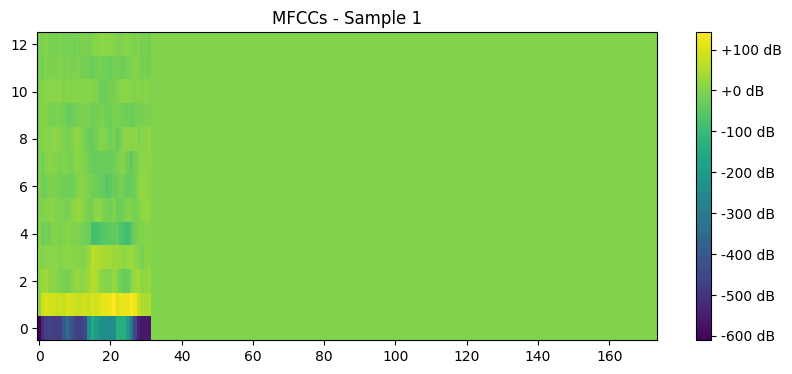

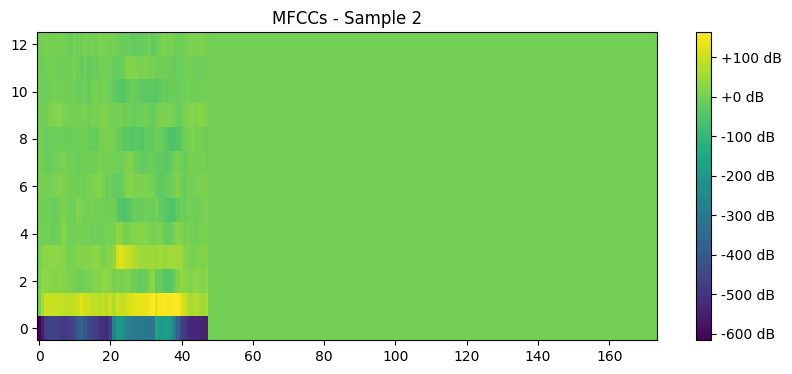

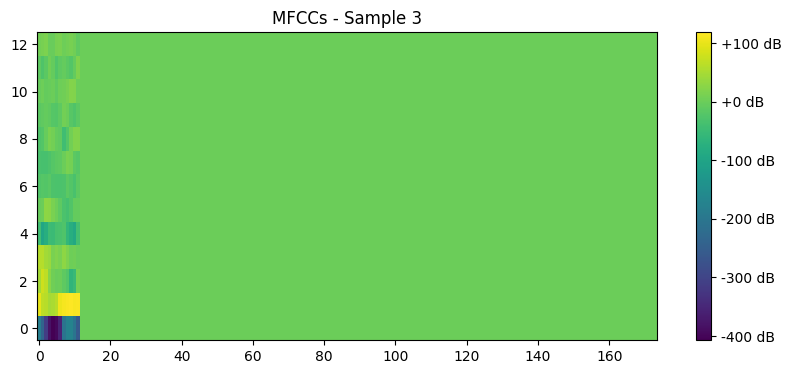

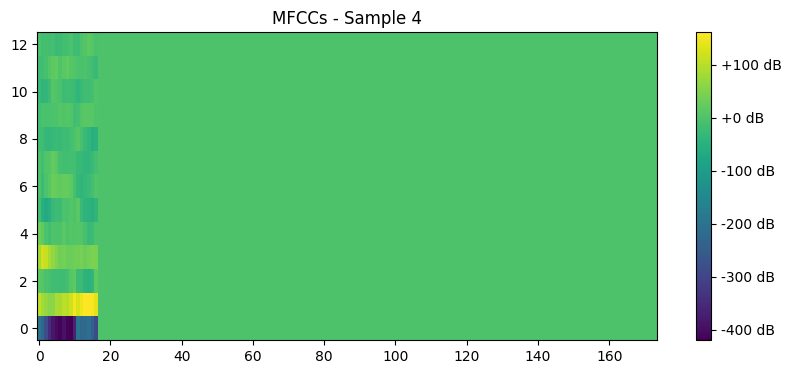

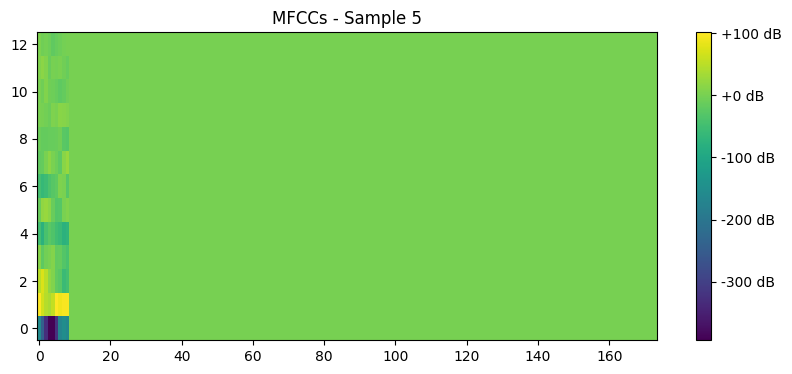

In [ ]:
import matplotlib.pyplot as plt

# Plot MFCCs for the first few samples
for i in range(min(5, len(data))):
    plt.figure(figsize=(10, 4))
    plt.imshow(data[i], cmap='viridis', origin='lower', aspect='auto')
    plt.title(f'MFCCs - Sample {i+1}')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa

def extract_mfcc_features(file_path, max_pad_len=174):
    try:
        # Load audio file using librosa
        audio, sr = librosa.load(file_path, sr=None)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

        # Pad the features to a constant length (optional)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None


In [ ]:
train_dir = '/content/drive/MyDrive/ip'

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def load_data(data_dir):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        print(f"Class directory: {class_dir}")  # Debugging print
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                print(f"Processing {audio_path}")  # Debugging print
                # Extract MFCC features for each audio file
                mfccs = extract_mfcc_features(audio_path)

                if mfccs is not None:
                    data.append(mfccs)
                    labels.append(class_idx)

    return np.array(data), np.array(labels)

# Load training data
train_data, train_labels = load_data(train_dir)

# Add debugging prints
print("Original train_data shape:", train_data.shape)

# Reshape the data to add a third dimension for the number of channels (assuming mono audio)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)

# Debugging print
print("Reshaped train_data shape:", train_data.shape)

# Defining the number of classes
num_classes = 7

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)

# ... (rest of the model building and training code)


Streaming output truncated to the last 5000 lines.
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_trimmed_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_trimmed_spectral_reduced_1.20.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_0.80_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_0.80_spectral_reduced_1.20.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_1.20_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_1.20_spectral_reduced_1.20.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.41 AM (1)_original_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 a

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def load_data(data_dir):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        print(f"Class directory: {class_dir}")  # Debugging print
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                print(f"Processing {audio_path}")  # Debugging print
                # Extract MFCC features for each audio file
                mfccs = extract_mfcc_features(audio_path)

                if mfccs is not None:
                    data.append(mfccs)
                    labels.append(class_idx)

    return np.array(data), np.array(labels)

# Load training data
train_data, train_labels = load_data(train_dir)

# Add debugging prints
print("Original train_data shape:", train_data.shape)

# Reshape the data to add a third dimension for the number of channels (assuming mono audio)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)

# Debugging print
print("Reshaped train_data shape:", train_data.shape)

# Defining the number of classes
num_classes = 7

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model using only the training data (without validation)
history = model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_split=0.1)


Streaming output truncated to the last 5000 lines.
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_trimmed_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_trimmed_spectral_reduced_1.20.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_0.80_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_0.80_spectral_reduced_1.20.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_1.20_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.27 AM_spectral_reduceded_1.20_spectral_reduced_1.20.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 at 12.56.41 AM (1)_original_spectral_reduced_0.80.ogg
Processing /content/drive/MyDrive/ip/day_3/WhatsApp Ptt 2023-08-31 a

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_2. Consider increasing the input size. Received input shape [None, 1, 32] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks, e.g., to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[checkpoint])

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_11. Consider increasing the input size. Received input shape [None, 1, 32] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
print("Shape of train_data:", train_data.shape)


Shape of train_data: (7105, 13, 174, 1)


In [ ]:
# Assuming train_data is your input data
input_shape = (train_data.shape[1], train_data.shape[2])

# Reshape the data to remove the last dimension
train_data_reshaped = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2])

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary to check the model architecture
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                61184     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 65799 (257.03 KB)
Trainable params: 65799 (257.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Assuming train_labels is your one-hot encoded labels
# Train-test split or any other data splitting method you prefer
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, train_labels, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=2, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on a new data point (adjust as needed)
new_data_point = X_test[0:1]  # Assuming the first data point in the test set
predictions = model.predict(new_data_point)
print("Predictions:", predictions)


Epoch 1/50
2274/2274 [==============================] - 55s 24ms/step - loss: 1.9666 - accuracy: 0.2292 - val_loss: 1.8899 - val_accuracy: 0.2128
Epoch 2/50
2274/2274 [==============================] - 53s 23ms/step - loss: 1.8986 - accuracy: 0.2173 - val_loss: 1.9148 - val_accuracy: 0.2111
Epoch 3/50
2274/2274 [==============================] - 54s 24ms/step - loss: 1.8985 - accuracy: 0.2160 - val_loss: 1.8897 - val_accuracy: 0.2111
Epoch 4/50
2274/2274 [==============================] - 54s 24ms/step - loss: 1.8918 - accuracy: 0.2166 - val_loss: 1.8913 - val_accuracy: 0.2102
Epoch 5/50
2274/2274 [==============================] - 56s 25ms/step - loss: 1.8911 - accuracy: 0.2166 - val_loss: 1.8917 - val_accuracy: 0.2120
Epoch 6/50
2274/2274 [==============================] - 53s 23ms/step - loss: 1.8903 - accuracy: 0.2171 - val_loss: 1.8913 - val_accuracy: 0.2102
Epoch 7/50
2274/2274 [==============================] - 54s 24ms/step - loss: 1.8914 - accuracy: 0.2164 - val_loss: 1.8979 -

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


NameError: name 'train_data' is not defined